In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
from sklearn.utils import shuffle
from datetime import date 
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-forecast/features.csv
/kaggle/input/walmart-sales-forecast/stores.csv
/kaggle/input/walmart-sales-forecast/train.csv
/kaggle/input/walmart-sales-forecast/test.csv


In [2]:
!pip install --user tensorflow_data_validation
import tensorflow_data_validation as tfdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.0/293.0 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

# [Tensorflow Data Validation (TFDV)](https://www.tensorflow.org/tfx/data_validation/get_started#inferring_a_schema_over_the_data) is an open-source library that helps to understand, validate, and monitor production machine learning (ML) data at scale. Common use-cases include comparing training, evaluation and serving datasets, as well as checking for training/serving skew

![](https://www.oreilly.com/api/v2/epubs/9781492053187/files/assets/bmlp_0401.png)

# Prepare dataset 
Concat feature data and train by data and store

In [3]:

features=pd.read_csv("/kaggle/input/walmart-sales-forecast/features.csv")
data=pd.read_csv("/kaggle/input/walmart-sales-forecast/train.csv")

df = pd.merge(data,features,on=['Store','Date'],how='right')



In [4]:
df.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1.0,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2.0,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3.0,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4.0,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423325 entries, 0 to 423324
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Dept          421570 non-null  float64
 2   Date          423325 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  object 
 5   Temperature   423325 non-null  float64
 6   Fuel_Price    423325 non-null  float64
 7   MarkDown1     152433 non-null  float64
 8   MarkDown2     112532 non-null  float64
 9   MarkDown3     138658 non-null  float64
 10  MarkDown4     136466 non-null  float64
 11  MarkDown5     153187 non-null  float64
 12  CPI           422740 non-null  float64
 13  Unemployment  422740 non-null  float64
 14  IsHoliday_y   423325 non-null  bool   
dtypes: bool(1), float64(11), int64(1), object(2)
memory usage: 45.6+ MB


In [6]:
df.tail(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
423321,45,NaN,2013-07-05,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,2013-07-12,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,2013-07-19,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
423324,45,NaN,2013-07-26,NaN,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


**Ways to shuffle dataset**

Shuffling is process to aviod overfitting one or few features in different sets and [improvs generalizability](https://www.deepwizai.com/simply-deep/why-random-shuffling-improves-generalizability-of-neural-nets). For example, some datasets are arranged by geographical location so directly splitting them might result in training sets that only come from locations that are not found in the evaluation and serving sets. That will likely result in a model that will only do well on the locations found in the training set.

![](https://images.squarespace-cdn.com/content/v1/5f7384eafb2f3173e7d5c078/1611947452754-GFUHEWQIF9JBSVDQJDFC/with_shuffle.gif)

In [7]:
#with sklearn
sh=shuffle(df)
sh.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
138314,14,36.0,2012-09-28,1073.66,False,64.88,3.997,3816.64,38.19,8.16,2545.14,3536.04,192.013558,8.684,False
411531,44,92.0,2012-01-20,45315.65,False,32.71,3.047,378.20,22.42,66.00,NaN,481.09,130.279226,5.774,False
269619,28,33.0,2010-07-09,7817.25,False,90.37,3.100,NaN,NaN,NaN,NaN,NaN,126.151800,14.180,False
225159,23,23.0,2012-02-17,40684.84,False,27.01,3.703,8924.48,10140.32,1.88,6699.65,2236.81,137.258310,4.261,False


In [8]:
#by dataframe parameters
shuffled_df = df.sample(frac=1, random_state=48)
shuffled_df.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
87586,9,2.0,2012-10-05,27504.15,False,66.61,3.617,2657.57,NaN,3.01,1107.79,1560.55,226.966232,4.954,False
312411,32,2.0,2012-01-27,45773.46,False,36.67,3.038,1212.68,2986.04,177.27,69.87,2324.48,196.826279,8.256,False
138804,15,97.0,2010-02-12,1986.32,True,22.00,2.940,NaN,NaN,NaN,NaN,NaN,131.586613,8.350,True
188210,20,85.0,2010-02-12,3189.01,True,22.12,2.773,NaN,NaN,NaN,NaN,NaN,204.385747,8.187,True


In [9]:
#by spliting test and val sets
train_df,test_val_df=train_test_split(df, test_size=0.2, shuffle=True)


In [10]:

print(test_val_df.shape)
test_val_df.head()

(84665, 15)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
321802,33,NaN,2013-03-15,NaN,NaN,63.26,3.885,23.75,NaN,NaN,NaN,272.39,132.466806,6.806,False
416648,45,60.0,2010-12-10,281.60,False,30.54,3.109,NaN,NaN,NaN,NaN,NaN,182.551954,8.724,False
320675,33,14.0,2012-05-18,787.53,False,89.81,4.308,103.81,NaN,NaN,NaN,2161.91,131.098323,7.396,False
339725,35,83.0,2012-04-13,2070.34,False,52.22,4.044,4697.48,4222.33,10.5,1903.35,1156.10,141.843393,8.876,False
266762,27,72.0,2012-06-29,53517.46,False,73.94,3.667,7582.01,585.90,NaN,1019.28,3522.11,142.192038,8.253,False


In [11]:

print(train_df.shape)
test_val_df.head()

(338660, 15)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
321802,33,NaN,2013-03-15,NaN,NaN,63.26,3.885,23.75,NaN,NaN,NaN,272.39,132.466806,6.806,False
416648,45,60.0,2010-12-10,281.60,False,30.54,3.109,NaN,NaN,NaN,NaN,NaN,182.551954,8.724,False
320675,33,14.0,2012-05-18,787.53,False,89.81,4.308,103.81,NaN,NaN,NaN,2161.91,131.098323,7.396,False
339725,35,83.0,2012-04-13,2070.34,False,52.22,4.044,4697.48,4222.33,10.5,1903.35,1156.10,141.843393,8.876,False
266762,27,72.0,2012-06-29,53517.46,False,73.94,3.667,7582.01,585.90,NaN,1019.28,3522.11,142.192038,8.253,False


In [12]:
#val set divided by train and val
train_len=test_val_df.shape[0]//2
val_df=test_val_df.iloc[:train_len].reset_index(drop=True)
test_df=test_val_df.iloc[train_len+1:].reset_index(drop=True)
print("val shape:",val_df.shape," test shape:",test_df.shape)

val shape: (42332, 15)  test shape: (42332, 15)


In [13]:
val_df=val_df.drop(['Weekly_Sales'],axis=1)
val_df.shape

(42332, 14)

StatsOptions helps to define columns that will be in training/test/val sets by removing irrelavant feature(columns). 

In this example there is only one feature - **IsHoliday_y**, that duplicates **IsHoliday_x**

*I found that if merged dataframes as df = first_df.merge(second_df,on=['column_a','column_b'],how='right'), '__index_level_0__' feature (this feature appered after merge) will be in stats_options.feature_allowlist, but if merged as shown before, this feature will be only in schema.*

In [14]:
features_to_remove = {'IsHoliday_y'}
approved_cols = [col for col in df.columns if (col not in features_to_remove)]

# Instantiate a StatsOptions class and define the feature_allowlist property
stats_options = tfdv.StatsOptions(feature_allowlist=approved_cols)

for feature in stats_options.feature_allowlist:
    print(feature)

Store
Dept
Date
Weekly_Sales
IsHoliday_x
Temperature
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
CPI
Unemployment


# Training statistics

TFDV allows to generate statistics from different data formats such as CSV or a Pandas DataFrame.

I will use tfdv.generate_statistics_from_dataframe() which, given a DataFrame and stats_options, generates an object of type DatasetFeatureStatisticsList. This object includes the computed statistics of the given dataset. 

In [15]:
train_stats = tfdv.generate_statistics_from_dataframe(train_df,stats_options=stats_options)

In [16]:
print(f"Number of features used: {len(train_stats.datasets[0].features)}")
print(f"Number of examples used: {train_stats.datasets[0].num_examples}")
print(f"First feature: {train_stats.datasets[0].features[0].path.step[0]}")
print(f"Last feature: {train_stats.datasets[0].features[-2].path.step[0]}")

Number of features used: 15
Number of examples used: 338660
First feature: Store
Last feature: Unemployment


In [17]:
tfdv.visualize_statistics(train_stats)


# Schema

A schema defines the properties of the data and can thus be used to detect errors. Some of these properties include:

* which features are expected to be present
* feature type
* the number of values for a feature in each example
* the presence of each feature across all examples
* the expected domains of features

Schema by training stats is "core" schema, with it I will detect anomalies, data drift and skew in test and val, also calling serving, sets.

In [18]:
schema = tfdv.infer_schema(train_stats)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Store',INT,required,,-
'Dept',FLOAT,optional,single,-
'Date',BYTES,required,,-
'Weekly_Sales',FLOAT,optional,single,-
'IsHoliday_x',INT,optional,single,-
'Temperature',FLOAT,required,,-
'Fuel_Price',FLOAT,required,,-
'MarkDown1',FLOAT,optional,single,-
'MarkDown2',FLOAT,optional,single,-


# Compare Training and Test Statistics

In [19]:
test_stats = tfdv.generate_statistics_from_dataframe(test_df, stats_options=stats_options)
tfdv.visualize_statistics(lhs_statistics=test_stats, rhs_statistics=train_stats,
                          lhs_name='TEST_DATASET', rhs_name='TRAIN_DATASET')

# Detect Anomalies

In [20]:
def calculate_and_display_anomalies(statistics, schema):
    anomalies = tfdv.validate_statistics(statistics,schema)
    tfdv.display_anomalies(anomalies)

In [21]:
calculate_and_display_anomalies(train_stats, schema)

In [22]:
calculate_and_display_anomalies(test_stats, schema)

,Anomaly short description,Anomaly long description
Feature name,,
'__index_level_0__',Column dropped,Column is completely missing


Feature '__index_level_0__' marked as anomaly only in test_df, possible reason is in this [forum](https://discuss.huggingface.co/t/keyerror-index-level-0-error-with-datasets-arrow-writer-py/18082). 

I will ignore this column as anomaly with environment 

# Statistics for validation data

In [23]:
val_stats = tfdv.generate_statistics_from_dataframe(val_df, stats_options=stats_options)
calculate_and_display_anomalies(val_stats, schema=schema)

,Anomaly short description,Anomaly long description
Feature name,,
'__index_level_0__',Column dropped,Column is completely missing
'Weekly_Sales',Column dropped,Column is completely missing


# Detecting anomalies with environment

In [24]:
#set default environment 
schema.default_environment.append('TRAINING')
# 'serving' also called validation
schema.default_environment.append('SERVING')

In [25]:
tfdv.get_feature(schema, 'Weekly_Sales').not_in_environment.append('SERVING')
tfdv.get_feature(schema,'__index_level_0__' ).not_in_environment.append('SERVING')
serving_anomalies_with_env = tfdv.validate_statistics(val_stats, schema, environment='SERVING')



In [26]:
tfdv.display_anomalies(serving_anomalies_with_env)

In [27]:
tfdv.get_feature(schema,'__index_level_0__' ).not_in_environment.append('TRAINING')
test_anomalies_with_env = tfdv.validate_statistics(test_stats, schema, environment='TRAINING')
tfdv.display_anomalies(test_anomalies_with_env)

# Data Drift and Data Skew

Monitoring data drift and skew can prevent model decay, when model accuracy goes down due to changes in data

!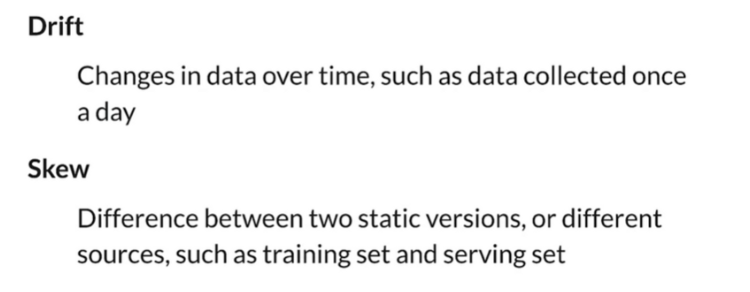

I will use dist skew as skew for measure unemployment 
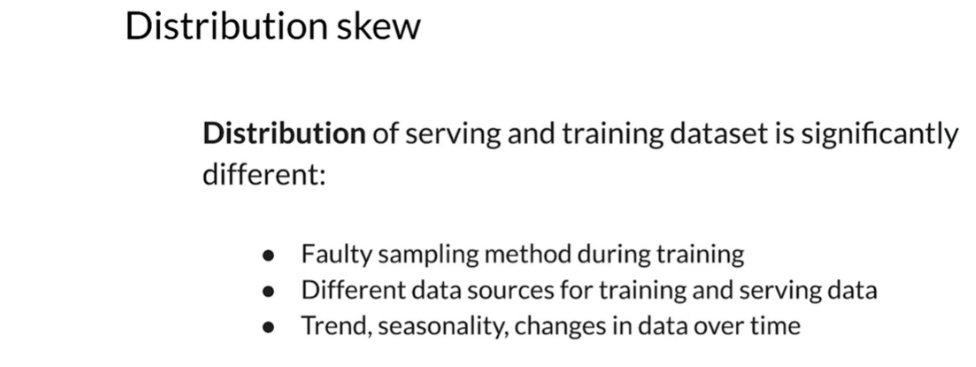

In [28]:
train_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,338660.000000,337285.000000,337285.000000,338660.000000,338660.000000,121810.000000,90118.000000,110799.000000,109141.000000,122424.000000,338211.000000,338211.000000
mean,22.209824,44.226506,15987.596506,60.034586,3.361470,7250.601891,3353.978265,1442.210959,3378.758823,4615.047539,171.202245,7.956800
std,12.788989,30.481008,22686.731371,18.468938,0.457951,8292.331726,9499.597386,9636.722772,6295.474937,6336.430440,39.165622,1.861016
min,1.000000,1.000000,-3924.000000,-6.610000,2.472000,-772.210000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,11.000000,18.000000,2082.300000,46.650000,2.934000,2241.190000,41.940000,5.100000,500.910000,1861.160000,132.022667,6.891000
50%,22.000000,37.000000,7611.730000,62.010000,3.452000,5347.450000,194.670000,24.820000,1479.910000,3332.990000,182.318780,7.866000
75%,33.000000,74.000000,20211.490000,74.260000,3.737000,9235.590000,1957.490000,104.465000,3578.400000,5535.130000,212.416993,8.567000
max,45.000000,99.000000,649770.180000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [29]:
#CPI is an average change overtime in the price, so it can drift
CPI = tfdv.get_feature(schema, 'CPI')
CPI.drift_comparator.infinity_norm.threshold = 0.5

#Unemployment can change with seasonality
Unemployment = tfdv.get_feature(schema, 'Unemployment')
Unemployment.skew_comparator.infinity_norm.threshold = 0.01

skew_drift_anomalies = tfdv.validate_statistics(train_stats, schema,
                                          previous_statistics=test_stats,
                                          serving_statistics=val_stats)

tfdv.display_anomalies(skew_drift_anomalies)

# Freeze schema

Schema can be used to validate upcoming data, from users for example.

In [30]:
from tensorflow.python.lib.io import file_io
OUTPUT_DIR = "output"
file_io.recursive_create_dir(OUTPUT_DIR)
schema_file = os.path.join(OUTPUT_DIR, 'schema.pbtxt')

# write_schema_text function expect the defined schema and output path as parameters
tfdv.write_schema_text(schema, schema_file) 